## In this notebook we search for best parameters for benchmark algorithms

In [1]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

In [30]:
%%time
import gc

with open("dataset/r6b/subsample/data_10.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 3.86 s, sys: 2.84 s, total: 6.69 s
Wall time: 24.4 s


In [31]:
average_ctr = data.gather_all_average_ctrs(average_over=2000)
get_average_ctr_plot(average_ctr)

In [32]:
def plot_ctrs(ctr_dict):
    fig, ax = plt.subplots(1,1, figsize=(10, 5));
    
    N = 40
    
    for label, ctr in ctr_dict.items():
        ax.plot(ctr[N:], label=label)
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('Evaluation without costs')

    plt.legend();
    plt.show();

In [33]:
NUM_OF_TRIALS = None

In [34]:
ctr_dict = {}
epsilons = [0.1, 0.2, 0.3, 0.4]
for eps in epsilons:
    egreedy_alg = algorithms.EpsilonGreedy(epsilon=eps, total_n_arms=data.n_arms)
    ctr = evaluation.evaluate(egreedy_alg, data, stop_after=NUM_OF_TRIALS)
    ctr_dict[f"E-greedy {eps}"] = ctr

E-greedy(epsilon=0.1) with ZeroCosts
Average reward: 0.0754
Execution time: 3.6m
E-greedy(epsilon=0.2) with ZeroCosts
Average reward: 0.0667
Execution time: 3.7m
E-greedy(epsilon=0.3) with ZeroCosts
Average reward: 0.064
Execution time: 3.6m
E-greedy(epsilon=0.4) with ZeroCosts
Average reward: 0.0593
Execution time: 3.6m


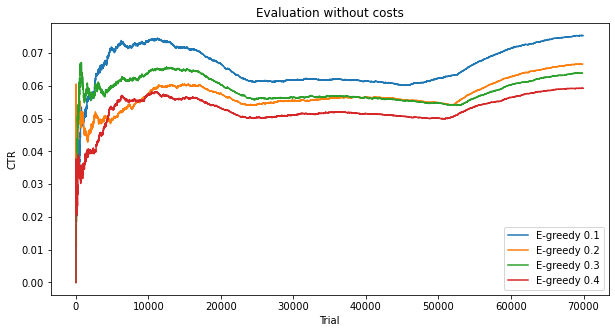

In [35]:
plot_ctrs(ctr_dict)

In [36]:
ctr_dict = {}
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
for alpha in alphas:
    linucb_alg = algorithms.LinUCB(
        context_dimension=len(data.events[0].user_features),
        n_arms=data.n_arms,
        alpha=alpha,
    )
    ctr = evaluation.evaluate(linucb_alg, data, stop_after=NUM_OF_TRIALS)
    ctr_dict[f"LinUCB {alpha}"] = ctr

LinUCB (alpha=0.1 with ZeroCosts
Average reward: 0.0559
Execution time: 27.7m
LinUCB (alpha=0.2 with ZeroCosts
Average reward: 0.0585
Execution time: 25.1m
LinUCB (alpha=0.3 with ZeroCosts
Average reward: 0.0637
Execution time: 22.1m
LinUCB (alpha=0.4 with ZeroCosts
Average reward: 0.0599
Execution time: 22.2m
LinUCB (alpha=0.5 with ZeroCosts
Average reward: 0.059
Execution time: 22.1m


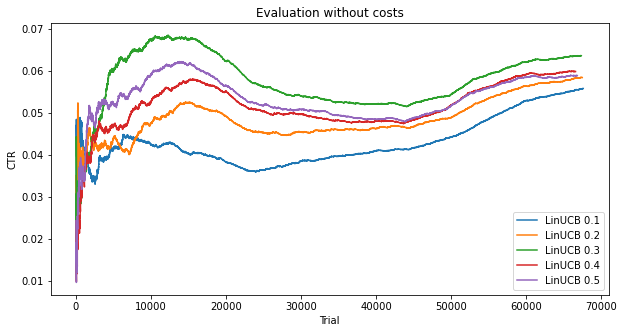

In [37]:
plot_ctrs(ctr_dict)